🔭 Project A — Blackbody Radiation & Stellar Spectrum Fitting
Step 1 — Theory recap

A star’s light is well-approximated by a blackbody curve:

𝐵
𝜆
(
𝑇
)
=
2
ℎ
𝑐
2
𝜆
5
⋅
1
𝑒
ℎ
𝑐
/
(
𝜆
𝑘
𝐵
𝑇
)
−
1
B
λ
	​

(T)=
λ
5
2hc
2
	​

⋅
e
hc/(λk
B
	​

T)
−1
1
	​


ℎ
h: Planck’s constant

𝑐
c: speed of light

𝑘
𝐵
k
B
	​

: Boltzmann’s constant

𝑇
T: temperature of the star

𝜆
λ: wavelength

From this, we can:

Fit a star’s observed spectrum → estimate effective temperature 
𝑇
T.

Use flux & distance → estimate stellar radius (via Stefan–Boltzmann law).

In [1]:
# Blackbody Spectrum Analysis Project
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k
from scipy.optimize import curve_fit


In [2]:
# --- Step 1: Define blackbody function (Planck’s law) ---
def planck(wavelength, T):
    """
    Blackbody spectral radiance B_lambda.
    wavelength: in meters
    T: temperature in Kelvin
    """
    wl = wavelength
    return (2*h*c**2) / (wl**5) / (np.exp((h*c)/(wl*k*T)) - 1)


In [3]:
# --- Step 2: Generate synthetic spectrum (like a star at 6000 K) ---
T_true = 6000
wavelengths = np.linspace(200e-9, 2000e-9, 300)  # 200–2000 nm
flux_true = planck(wavelengths, T_true)

# add noise to mimic observation
rng = np.random.default_rng(42)
noise = flux_true * 0.05 * rng.normal(size=flux_true.size)  # 5% noise
flux_obs = flux_true + noise

Step 3 — What you’ll see

Black dots = noisy synthetic observation of a star.

Blue curve = true 6000 K blackbody spectrum.

Red dashed = best-fit model (should recover ~6000 K within errors).

In [4]:
# --- Step 3: Fit blackbody curve to noisy data ---
popt, pcov = curve_fit(planck, wavelengths, flux_obs, p0=[5500])
T_fit = popt[0]
T_err = np.sqrt(np.diag(pcov))[0]

Step 4 — Extensions

Change T_true (e.g. 3500 K for a red star, 10000 K for a blue star) and rerun.

Plot multiple stars on the same graph to compare spectra.

Compute Wien’s peak wavelength:

𝜆
max
=
2.898
×
10
−
3
𝑇
λ
max
	​

=
T
2.898×10
−3
	​

 m
→ compare with your fitted values.

(Advanced) If given luminosity + distance, compute stellar radius using

𝐿
=
4
𝜋
𝑅
2
𝜎
𝑇
4
L=4πR
2
σT
4

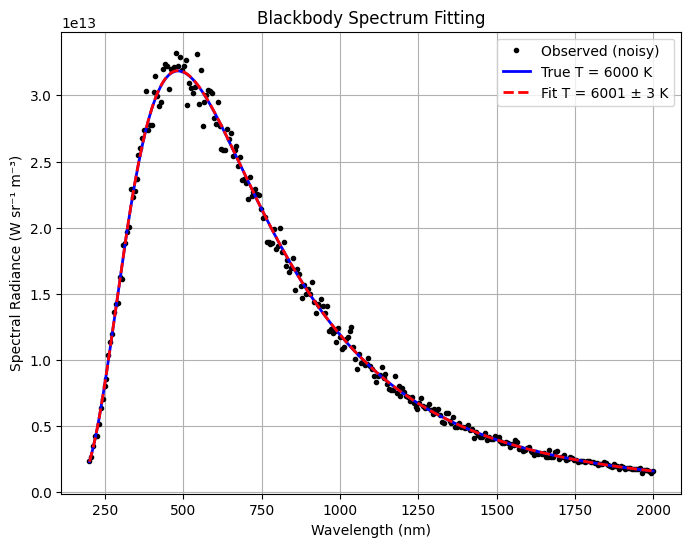

In [7]:
# --- Step 4: Plot results ---
plt.figure(figsize=(8,6))
plt.plot(wavelengths*1e9, flux_obs, 'k.', label="Observed (noisy)")
plt.plot(wavelengths*1e9, flux_true, 'b-', lw=2, label=f"True T = {T_true} K")
plt.plot(wavelengths*1e9, planck(wavelengths, T_fit), 'r--', lw=2,
         label=f"Fit T = {T_fit:.0f} ± {T_err:.0f} K")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Spectral Radiance (W sr⁻¹ m⁻³)")
plt.title("Blackbody Spectrum Fitting")
plt.legend()
plt.grid(True)
plt.show()